## Setup GPU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Mon Dec  6 21:07:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15376, done.
remote: Total 15376 (delta 0), reused 0 (delta 0), pack-reused 15376
Receiving objects: 100% (15376/15376), 14.01 MiB | 14.74 MiB/s, done.
Resolving deltas: 100% (10340/10340), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
# make path to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
%cd darknet

## Moving Dataset to the cloud

In [ ]:
!ls /mydrive/yolov3_day_night

backup				 obj.data   yolov3_custom.cfg
color_img_1632124522.891653.jpg  obj.names  YOLOv3_day_night.ipynb
generate_test.py		 obj.zip
generate_train.py		 test.zip


In [ ]:
# copy the .zip file to cloud VM
!cp /mydrive/yolov3_day_night/obj.zip ../
!cp /mydrive/yolov3_day_night/test.zip ../

In [ ]:
! pwd

/darknet


In [ ]:
# unzip the zip file
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/__MACOSX/._obj     
  inflating: data/obj/color_img_1630660585.598941.jpg  
  inflating: data/__MACOSX/obj/._color_img_1630660585.598941.jpg  
  inflating: data/obj/color_img_1630660592.110129.jpg  
  inflating: data/__MACOSX/obj/._color_img_1630660592.110129.jpg  
  inflating: data/obj/color_img_1630663620.809934.jpg  
  inflating: data/__MACOSX/obj/._color_img_1630663620.809934.jpg  
  inflating: data/obj/color_img_1630660575.135770.txt  
  inflating: data/__MACOSX/obj/._color_img_1630660575.135770.txt  
  inflating: data/obj/color_img_1632124921.303497.txt  
  inflating: data/__MACOSX/obj/._color_img_1632124921.303497.txt  
  inflating: data/obj/color_img_1630663605.698870.txt  
  inflating: data/__MACOSX/obj/._color_img_1630663605.698870.txt  
  inflating: data/obj/color_img_1632124274.371361.jpg  
  inflating: data/__MACOSX/obj/._color_img_1632124274.371361.jpg  
  inflating: data/obj/color_img_1632124411.871981.txt  
 

## Configuring

In [ ]:
! pwd

/darknet


In [ ]:
# upload the custom .cfg to cloud VM 
!cp /mydrive/yolov3_day_night/yolov3_custom.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM
!cp /mydrive/yolov3_day_night/obj.names ./data
!cp /mydrive/yolov3_day_night/obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM 
!cp /mydrive/yolov3_day_night/generate_train.py ./
!cp /mydrive/yolov3_day_night/generate_test.py ./


In [ ]:
! ls data

9k.tree     eagle.jpg	 imagenet.labels.list	   obj		     person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.data	     scream.jpg
coco.names  goal.txt	 labels			   obj.names	     test
dog.jpg     horses.jpg	 __MACOSX		   openimages.names  voc.names


In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# verify train.txt in the data folder
!ls data/

9k.tree     giraffe.jpg		      labels	 openimages.names  train.txt
coco9k.map  goal.txt		      __MACOSX	 person.jpg	   voc.names
coco.names  horses.jpg		      obj	 scream.jpg
dog.jpg     imagenet.labels.list      obj.data	 test
eagle.jpg   imagenet.shortnames.list  obj.names  test.txt


## Download Pre-trained Model

In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-12-06 21:10:59--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   107MB/s    in 1.4s    

2021-12-06 21:11:01 (107 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## Training Detector

In [ ]:
# train custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 289191, rewritten_bbox = 0.133822 % 

 1926: 0.148607, 0.181827 avg loss, 0.000010 rate, 5.207718 seconds, 123264 images, 0.160218 hours left
Loaded: 0.000066 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.868911), count: 6, class_loss = 0.003876, iou_loss = 0.115661, total_loss = 0.119538 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.874602), count: 5, class_loss = 0.000261, iou_loss = 0.067863, total_loss = 0.068123 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 289202, rewritten_bbox = 0.133816 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.855954), count: 10, class_loss = 0.544792, iou_loss = 0.204913, total_loss = 0.749705 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

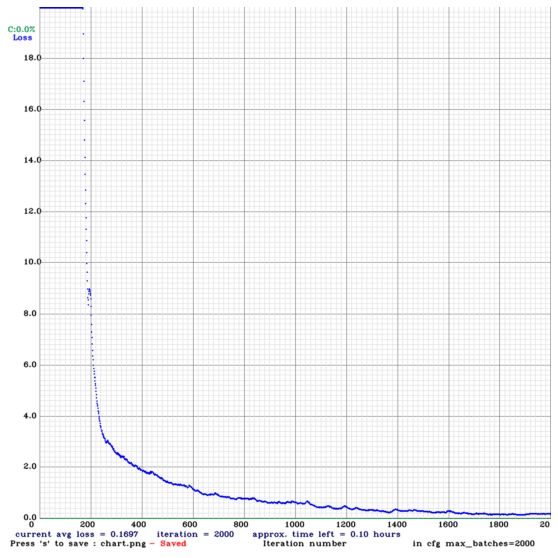

In [ ]:
imShow('chart.png')

## Run Detector

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/darknet/cfg
/darknet


 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

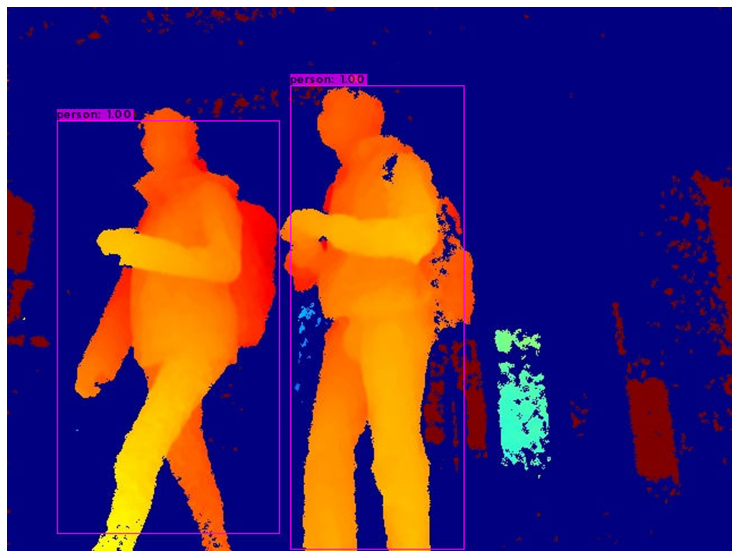

In [ ]:
# run detector with a test image
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3_day_night/backup/yolov3_custom_last.weights /mydrive/yolov3/color_img_1632124522.891653.jpg -thresh 0.3
imShow('predictions.jpg')